<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">VAST Challenge</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Data Loading and EDA</span>

In [ ]:
################### kepler
# Ver https://docs.kepler.gl/ visualizador de datos georeferenciados

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=Warning)
# Seteos de Pandas para ver mejor la info. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# In max_columns and max_rows ‘None’ value means unlimited.
pd.set_option('display.max_rows', 100)
# Conviene setear min_rows también porque cuando se superan las max_rows, sólo muestra la cantidad indicada en min_rows.
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:.1f}'.format

In [2]:
from datetime import datetime

In [3]:
import os
path = os.getcwd()
print('getcwd:      ', path)

getcwd:       C:\Users\Usuario\OneDrive\0-Data Science\data_science\datascience\VAST_challenge


In [4]:
path_data = r'C:\data\VAST-Challenge-2022\Datasets'

<span style="font-family:Arial Black; font-size:150%;color:LightSteelBlue">Attributes Load</span>

In [5]:
df_pa = pd.read_csv(path_data+'\Attributes\Participants.csv')
print(df_pa.shape)
print(df_pa.dtypes)
df_pa.head(2)

(1011, 7)
participantId       int64
householdSize       int64
haveKids             bool
age                 int64
educationLevel     object
interestGroup      object
joviality         float64
dtype: object


,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.0
1,1,3,True,25,HighSchoolOrCollege,B,0.3


In [6]:
df_a = pd.read_csv(path_data+'\Attributes\Apartments.csv')
print(df_a.shape)
print(df_a.dtypes)
df_a.head(2)

(1517, 6)
apartmentId        int64
rentalCost       float64
maxOccupancy       int64
numberOfRooms      int64
location          object
buildingId         int64
dtype: object


,apartmentId,rentalCost,maxOccupancy,numberOfRooms,location,buildingId
0,1,768.2,2,4,POINT (1077.6979444315298 648.4427163702453),340
1,2,1014.5,2,1,POINT (-185.9292838076562 1520.3270983045118),752


In [7]:
# last column 'units' seems to lead to apartmentid? or aparmentid + schoolid etc?
df_b = pd.read_csv(path_data+'\Attributes\Buildings.csv')
print(df_b.shape)
print(df_b.dtypes)
print('Building Types:', df_b.buildingType.unique())
df_b.head(2)

(1042, 5)
buildingId        int64
location         object
buildingType     object
maxOccupancy    float64
units            object
dtype: object
Building Types: ['Commercial' 'Residental' 'School']


,buildingId,location,buildingType,maxOccupancy,units
0,1,"POLYGON ((350.0638997002585 4595.665606173783, 390.0632568061789 4595.892390461278, 390.68102014...",Commercial,NaN,NaN
1,2,"POLYGON ((-1926.972613718425 2725.6106868067013, -1948.1911073943602 2730.2396710432536, -1950.0...",Residental,12.0,"[481,498,534,652,818]"


In [8]:
df_e = pd.read_csv(path_data+'\Attributes\Employers.csv')
print(df_e.shape)
print(df_e.dtypes)
df_e.head(2)

(253, 3)
employerId     int64
location      object
buildingId     int64
dtype: object


,employerId,location,buildingId
0,379,POINT (-1849.997168394888 1744.6010147106394),823
1,380,POINT (41.51783767879146 418.7264799744545),154


In [9]:
df_j = pd.read_csv(path_data+'\Attributes\Jobs.csv')
print(df_j.shape)
print(df_j.dtypes)
df_j.head(2)

(1328, 7)
jobId                     int64
employerId                int64
hourlyRate              float64
startTime                object
endTime                  object
daysToWork               object
educationRequirement     object
dtype: object


,jobId,employerId,hourlyRate,startTime,endTime,daysToWork,educationRequirement
0,0,379,10.0,7:46:00 AM,3:46:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1,1,379,22.2,7:31:00 AM,3:31:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors


In [10]:
df_p = pd.read_csv(path_data+'\Attributes\Pubs.csv')
print(df_p.shape)
print(df_p.dtypes)
df_p.head(2)

(12, 5)
pubId             int64
hourlyCost      float64
maxOccupancy      int64
location         object
buildingId        int64
dtype: object


,pubId,hourlyCost,maxOccupancy,location,buildingId
0,442,8.3,64,POINT (964.4380231713202 3991.603473784208),556
1,443,6.4,64,POINT (1809.880173357865 4339.172426035451),29


In [11]:
# This pub is in a "Commercial" building, so may be units is the link between buildings and locations
df_build = df_b.copy()
df_build.units.fillna('', inplace=True)
df_build[df_build.units.str.contains('442')]

,buildingId,location,buildingType,maxOccupancy,units
282,283,"POLYGON ((-3418.5998491705445 6428.08502741653, -3419.369773464609 6468.077616937358, -3328.0661...",Residental,11.0,"[1442,1601,1613,1726]"
555,556,"POLYGON ((1040.019896408535 4049.4885792147434, 1039.8152208304625 4009.4891028693246, 976.18390...",Commercial,64.0,[442]


In [12]:
df_r = pd.read_csv(path_data+'\Attributes\Restaurants.csv')
print(df_r.shape)
print(df_r.dtypes)
df_r.head(2)

(20, 5)
restaurantId       int64
foodCost         float64
maxOccupancy       int64
location          object
buildingId         int64
dtype: object


,restaurantId,foodCost,maxOccupancy,location,buildingId
0,445,5.2,71,POINT (631.5130723031391 2001.4772026036535),304
1,446,4.2,82,POINT (413.840000705876 1194.128694228948),308


In [13]:
df_s = pd.read_csv(path_data+'\Attributes\Schools.csv')
print(df_s.shape)
print(df_s.dtypes)
df_s

(4, 5)
schoolId           int64
monthlyCost      float64
maxEnrollment      int64
location          object
buildingId         int64
dtype: object


,schoolId,monthlyCost,maxEnrollment,location,buildingId
0,0,12.8,242,POINT (-376.7505037068263 1607.9843212558562),662
1,450,91.1,418,POINT (-2597.447677094323 3194.1547530883445),943
2,900,38.0,394,POINT (-2539.1584040534744 6556.0323181733565),262
3,1350,73.2,384,POINT (-4701.462928834322 5141.762936081409),123


<span style="font-family:Arial Black; font-size:150%;color:LightSteelBlue">Journals Load</span>

In [14]:
# column venueId leads to pubs, schools, restaurants, apart, etc
df_cj = pd.read_csv(path_data+'\Journals\CheckinJournal.csv')
print(df_cj.shape)
print(df_cj.dtypes)
df_cj.head(2)

(2100635, 4)
participantId     int64
timestamp        object
venueId           int64
venueType        object
dtype: object


,participantId,timestamp,venueId,venueType
0,619,2022-03-01T05:35:00Z,1798,Pub
1,15,2022-03-01T05:50:00Z,1798,Pub


In [15]:
print('Pubs in Checkin:', df_cj[df_cj.venueType=='Pub'].drop_duplicates(subset=['venueId']).shape[0])
print('Venue Types:', df_cj.venueType.unique())

Pubs in Checkin: 12
Venue Types: ['Pub' 'Restaurant' 'Apartment' 'Workplace']


In [16]:
df_chkj = df_cj.copy()
df_chkj.timestamp = pd.to_datetime(df_chkj.timestamp, format='%Y-%m-%dT%H:%M:%SZ')

In [17]:
print(df_chkj.dtypes)

participantId             int64
timestamp        datetime64[ns]
venueId                   int64
venueType                object
dtype: object


In [18]:
# Get the end time for every checkin
df_chkj.sort_values(by=['participantId', 'timestamp'], inplace=True)
df_chkj['timestamp_end'] = df_chkj.groupby('participantId').shift(-1).timestamp

In [19]:
# Last row for each participant has not end time --> assign max end time
end_time = df_chkj.timestamp.max()
df_chkj.timestamp_end.fillna(end_time, inplace=True)

In [20]:
# Calculate duration
df_chkj['duration_min'] = (df_chkj.timestamp_end - df_chkj.timestamp).astype('timedelta64[m]')

In [21]:
df_chkj['duration_hour'] = df_chkj.duration_min/60
df_chkj['hour_of_day'] = df_chkj.timestamp.dt.hour

In [22]:
df_chkj.head()

,participantId,timestamp,venueId,venueType,timestamp_end,duration_min,duration_hour,hour_of_day
867,0,2022-03-01 08:20:00,424,Workplace,2022-03-01 08:30:00,10.0,0.2,8
1020,0,2022-03-01 08:30:00,446,Restaurant,2022-03-01 08:55:00,25.0,0.4,8
1322,0,2022-03-01 08:55:00,424,Workplace,2022-03-01 16:30:00,455.0,7.6,8
3568,0,2022-03-01 16:30:00,446,Restaurant,2022-03-01 16:55:00,25.0,0.4,16
3838,0,2022-03-01 16:55:00,424,Workplace,2022-03-01 19:20:00,145.0,2.4,16


In [23]:
df_chkj.to_csv(path_data+'\Journals\CheckinJournal_.csv')

In [24]:
# timestamp may be a date or have hours and minutes!!!
df_fj = pd.read_csv(path_data+'\Journals\FinancialJournal.csv')
#df_fj.timestamp = pd.to_datetime(df_fj.timestamp, format='%Y-%m-%dT%H:%M:%SZ')
print(df_fj.shape)
print(df_fj.dtypes)
print('Finantial Categories:', df_fj.category.unique())
df_fj.head(2)

(1856330, 4)
participantId      int64
timestamp         object
category          object
amount           float64
dtype: object
Finantial Categories: ['Wage' 'Shelter' 'Education' 'RentAdjustment' 'Food' 'Recreation']


,participantId,timestamp,category,amount
0,0,2022-03-01T00:00:00Z,Wage,2472.5
1,0,2022-03-01T00:00:00Z,Shelter,-555.0


In [25]:
df_snj = pd.read_csv(path_data+'\Journals\SocialNetwork.csv')
print(df_snj.shape)
print(df_snj.dtypes)
#print('Finantial Categories:', df_fj.category.unique())
df_snj.head(5)

(7482488, 3)
timestamp            object
participantIdFrom     int64
participantIdTo       int64
dtype: object


,timestamp,participantIdFrom,participantIdTo
0,2022-03-01T00:00:00Z,173,180
1,2022-03-01T00:00:00Z,178,183
2,2022-03-01T00:00:00Z,178,185
3,2022-03-01T00:00:00Z,180,173
4,2022-03-01T00:00:00Z,183,178


In [26]:
df_tj = pd.read_csv(path_data+'\Journals\TravelJournal.csv')
print(df_tj.shape)
print(df_tj.dtypes)
print('Purposes:', df_tj.purpose.unique())
df_tj.head(2)

(2099656, 10)
participantId              int64
travelStartTime           object
travelStartLocationId    float64
travelEndTime             object
travelEndLocationId        int64
purpose                   object
checkInTime               object
checkOutTime              object
startingBalance          float64
endingBalance            float64
dtype: object
Purposes: ['Recreation (Social Gathering)' 'Eating' 'Coming Back From Restaurant'
 'Work/Home Commute' 'Going Back to Home']


,participantId,travelStartTime,travelStartLocationId,travelEndTime,travelEndLocationId,purpose,checkInTime,checkOutTime,startingBalance,endingBalance
0,23,2022-03-01T05:20:00Z,532.0,2022-03-01T05:55:00Z,894,Recreation (Social Gathering),2022-03-01T05:55:00Z,2022-03-01T06:00:00Z,851.2,850.2
1,876,2022-03-01T05:50:00Z,NaN,2022-03-01T06:00:00Z,1804,Eating,2022-03-01T06:00:00Z,2022-03-01T06:05:00Z,2071.8,2065.9


<span style="font-family:Arial Black; font-size:150%;color:LightSteelBlue">EDA</span>

### C1
1. Assuming the volunteers are representative of the city’s population, characterize what you can about the demographics of the town.
2. Consider the social activities in the community. What patterns do you see in the social networks in the town? Describe up to ten significant patterns you observe, with evidence and rationale.
3. Identify the predominant business base of the town. Describe patterns you identify.

### C2
1. Assuming the volunteers are representative of the city’s population, characterize the distinct areas of the city that you identify. For each area you identify, provide your rationale and supporting data. 
2. Where are the busiest areas in Engagement? Are there traffic bottlenecks that should be addressed? Explain your rationale.
3. Participants have given permission to have their daily routines captured. Choose two different participants with different routines and describe their daily patterns, with supporting evidence.

### C3
1. Over the period covered by the dataset, which businesses appear to be more prosperous? Which appear to be struggling?
2. How does the financial health of the residents change over the period covered by the dataset? How do wages compare to the overall cost of living in Engagement? Are there groups that appear to exhibit similar patterns?
3. Describe the health of the various employers within the city limits. What employment patterns do you observe? Do you notice any areas of particularly high or low turnover?

In [27]:
# Build Venues Master
df_ = df_a[['apartmentId', 'location', 'buildingId']]
df_['venueId'] = df_.apartmentId
df_venues = df_
df_ = df_e[['employerId', 'location', 'buildingId']]
df_['venueId'] = df_.employerId
df_venues = pd.concat([df_venues, df_])
df_ = df_p[['pubId', 'location', 'buildingId']]
df_['venueId'] = df_.pubId
df_venues = pd.concat([df_venues, df_])
df_ = df_r[['restaurantId', 'location', 'buildingId']]
df_['venueId'] = df_.restaurantId
df_venues = pd.concat([df_venues, df_])
df_ = df_s[['schoolId', 'location', 'buildingId']]
df_['venueId'] = df_.schoolId
df_venues = pd.concat([df_venues, df_])
df_venues

,apartmentId,location,buildingId,venueId,employerId,pubId,restaurantId,schoolId
0,1.0,POINT (1077.6979444315298 648.4427163702453),340,1,NaN,NaN,NaN,NaN
1,2.0,POINT (-185.9292838076562 1520.3270983045118),752,2,NaN,NaN,NaN,NaN
2,3.0,POINT (2123.0141855392585 5126.753457243003),639,3,NaN,NaN,NaN,NaN
3,4.0,POINT (2103.6301776944765 4266.932930123476),397,4,NaN,NaN,NaN,NaN
4,5.0,POINT (7.0589743819342985 79.96163671849988),628,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19,NaN,POINT (-3927.9102395808727 5494.63962663673),285,1805,NaN,NaN,1805.0,NaN
0,NaN,POINT (-376.7505037068263 1607.9843212558562),662,0,NaN,NaN,NaN,0.0
1,NaN,POINT (-2597.447677094323 3194.1547530883445),943,450,NaN,NaN,NaN,450.0
2,NaN,POINT (-2539.1584040534744 6556.0323181733565),262,900,NaN,NaN,NaN,900.0


In [28]:
df_venues.to_csv(path_data+'\Attributes\Venues.csv')

## Datamarts

### Checkin's --> where is everyone, all the time + how much he spends

In [29]:
df_chkj.head(2)

,participantId,timestamp,venueId,venueType,timestamp_end,duration_min,duration_hour,hour_of_day
867,0,2022-03-01 08:20:00,424,Workplace,2022-03-01 08:30:00,10.0,0.2,8
1020,0,2022-03-01 08:30:00,446,Restaurant,2022-03-01 08:55:00,25.0,0.4,8


In [30]:
df_checkin = df_chkj.merge(df_a, left_on='venueId', right_on='apartmentId', how='left')[['participantId', 'timestamp', 'timestamp_end'
                        , 'duration_min', 'duration_hour', 'hour_of_day', 'venueId', 'venueType', 'rentalCost', 'location', 'buildingId']]

In [31]:
df_checkin = df_checkin.merge(df_e, left_on='venueId', right_on='employerId', how='left')[['participantId', 'timestamp', 'timestamp_end'
                            , 'duration_min', 'duration_hour', 'hour_of_day', 'venueId', 'venueType', 'rentalCost', 'location_x'
                            , 'buildingId_x', 'location_y', 'buildingId_y']]

In [32]:
df_checkin.location_x = np.where(df_checkin.location_x.isnull(), df_checkin.location_y, df_checkin.location_x)
df_checkin.buildingId_x = np.where(df_checkin.buildingId_x.isnull(), df_checkin.buildingId_y, df_checkin.buildingId_x)
df_checkin.rename(columns={'location_x': 'location', 'buildingId_x': 'buildingId'}, inplace=True)
df_checkin.drop(columns=['location_y', 'buildingId_y'], inplace=True)
df_checkin.head(2)

#[x.location_x for x in df_checkin] #location_x if nan in loca]

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId
0,0,2022-03-01 08:20:00,2022-03-01 08:30:00,10.0,0.2,8,424,Workplace,NaN,POINT (39.59877121487088 1259.7742218297456),936.0
1,0,2022-03-01 08:30:00,2022-03-01 08:55:00,25.0,0.4,8,446,Restaurant,NaN,NaN,NaN


In [33]:
df_checkin = df_checkin.merge(df_p, left_on='venueId', right_on='pubId', how='left')[['participantId', 'timestamp', 'timestamp_end'
                            , 'duration_min', 'duration_hour', 'hour_of_day', 'venueId', 'venueType', 'rentalCost', 'location_x'
                            , 'buildingId_x', 'hourlyCost', 'location_y', 'buildingId_y']]
df_checkin.location_x = np.where(df_checkin.location_x.isnull(), df_checkin.location_y, df_checkin.location_x)
df_checkin.buildingId_x = np.where(df_checkin.buildingId_x.isnull(), df_checkin.buildingId_y, df_checkin.buildingId_x)
df_checkin.rename(columns={'location_x': 'location', 'buildingId_x': 'buildingId', 'hourlyCost': 'pub_hourlyCost'}, inplace=True)
df_checkin.drop(columns=['location_y', 'buildingId_y'], inplace=True)
df_checkin.head(2)

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId,pub_hourlyCost
0,0,2022-03-01 08:20:00,2022-03-01 08:30:00,10.0,0.2,8,424,Workplace,NaN,POINT (39.59877121487088 1259.7742218297456),936.0,NaN
1,0,2022-03-01 08:30:00,2022-03-01 08:55:00,25.0,0.4,8,446,Restaurant,NaN,NaN,NaN,NaN


In [34]:
df_checkin = df_checkin.merge(df_r, left_on='venueId', right_on='restaurantId', how='left')[['participantId', 'timestamp', 'timestamp_end'
                            , 'duration_min', 'duration_hour', 'hour_of_day', 'venueId', 'venueType', 'rentalCost', 'location_x'
                            , 'buildingId_x', 'pub_hourlyCost', 'foodCost', 'location_y', 'buildingId_y']]
df_checkin.location_x = np.where(df_checkin.location_x.isnull(), df_checkin.location_y, df_checkin.location_x)
df_checkin.buildingId_x = np.where(df_checkin.buildingId_x.isnull(), df_checkin.buildingId_y, df_checkin.buildingId_x)
df_checkin.rename(columns={'location_x': 'location', 'buildingId_x': 'buildingId', 'foodCost': 'restaurant_foodCost'}, inplace=True)
df_checkin.drop(columns=['location_y', 'buildingId_y'], inplace=True)
df_checkin.head(2)

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId,pub_hourlyCost,restaurant_foodCost
0,0,2022-03-01 08:20:00,2022-03-01 08:30:00,10.0,0.2,8,424,Workplace,NaN,POINT (39.59877121487088 1259.7742218297456),936.0,NaN,NaN
1,0,2022-03-01 08:30:00,2022-03-01 08:55:00,25.0,0.4,8,446,Restaurant,NaN,POINT (413.840000705876 1194.128694228948),308.0,NaN,4.2


In [35]:
df_checkin['date'] = df_checkin.timestamp.dt.date.astype('datetime64[ns]')
df_checkin.head(2)

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId,pub_hourlyCost,restaurant_foodCost,date
0,0,2022-03-01 08:20:00,2022-03-01 08:30:00,10.0,0.2,8,424,Workplace,NaN,POINT (39.59877121487088 1259.7742218297456),936.0,NaN,NaN,2022-03-01
1,0,2022-03-01 08:30:00,2022-03-01 08:55:00,25.0,0.4,8,446,Restaurant,NaN,POINT (413.840000705876 1194.128694228948),308.0,NaN,4.2,2022-03-01


In [35]:
df_checkin.to_csv('C:\data\VAST-Challenge-2022\datamarts\CheckinJournal__.csv')

### Financial Journal --> How much everyone spends each day

In [36]:
df_finj = df_fj.copy()
df_finj.dtypes

participantId      int64
timestamp         object
category          object
amount           float64
dtype: object

In [37]:
df_finj.timestamp = pd.to_datetime(df_finj.timestamp, format='%Y-%m-%dT%H:%M:%SZ')

In [38]:
df_finj['month'] = pd.to_datetime(df_finj.timestamp.dt.year.astype(str) + '-' +
                                         df_finj.timestamp.dt.month.astype(str).str.zfill(2) + 
                                         '-01', format='%Y-%m-%d') 

In [39]:
df_finj['inputs'] = np.where(df_finj.amount > 0, df_finj.amount, 0)

In [40]:
df_finj['outputs'] = np.where(df_finj.amount < 0, df_finj.amount, 0)

In [41]:
df_balance= df_finj.groupby(['month', 'participantId'], as_index=False).agg(inputs=('inputs', 'sum'), outputs=('outputs', 'sum'))

In [42]:
df_balance['balance']=abs(df_balance.outputs)/df_balance.inputs

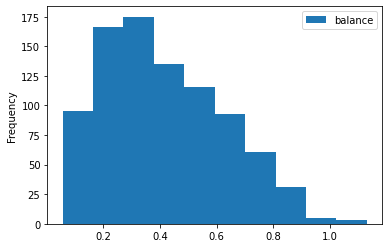

In [43]:
#df_balance[df_balance.participantId==1006]
df_balance[df_balance.month=='2022-06-01'][['balance']].plot.hist();

In [44]:
df_finj[(df_finj.participantId==1006) & (df_finj.timestamp>='2022-04-01')].groupby(['month']).agg(amount=('amount', 'sum')
                                                                                                  , inputs=('inputs', 'sum')
                                                                                                  , outputs=('outputs', 'sum'))

,amount,inputs,outputs
month,,,
2022-04-01,291.1,1680.0,-1388.9
2022-05-01,456.7,1760.0,-1303.3
2022-06-01,608.1,1760.0,-1151.9
2022-07-01,407.9,1680.0,-1272.1
2022-08-01,593.9,1840.0,-1246.1
2022-09-01,615.1,1760.0,-1144.9
2022-10-01,515.2,1680.0,-1164.8
2022-11-01,589.9,1760.0,-1170.1
2022-12-01,503.2,1760.0,-1256.8


In [45]:
df_balance.to_csv('C:\data\VAST-Challenge-2022\datamarts\monthly_balance.csv')

In [ ]:
df_finj.to_csv('C:\data\VAST-Challenge-2022\datamarts\FinancialJournal_.csv')

In [208]:
df_checkin.tail()

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId,pub_hourlyCost,restaurant_foodCost,date
2100630,1010,2023-05-24 11:50:00,2023-05-24 12:20:00,30.0,0.5,11,449,Restaurant,NaN,POINT (1407.7107695149243 4010.4574815269225),181.0,NaN,5.1,2023-05-24
2100631,1010,2023-05-24 12:20:00,2023-05-24 16:55:00,275.0,4.6,12,406,Workplace,NaN,POINT (973.2374190327052 3805.640410966102),347.0,NaN,NaN,2023-05-24
2100632,1010,2023-05-24 16:55:00,2023-05-24 17:20:00,25.0,0.4,16,597,Apartment,465.4,POINT (-2114.6474042009013 2602.884683527168),448.0,NaN,NaN,2023-05-24
2100633,1010,2023-05-24 17:20:00,2023-05-24 19:35:00,135.0,2.2,17,894,Pub,NaN,POINT (-1702.5378155541193 3865.477090848479),238.0,12.3,NaN,2023-05-24
2100634,1010,2023-05-24 19:35:00,2023-05-25 00:05:00,270.0,4.5,19,597,Apartment,465.4,POINT (-2114.6474042009013 2602.884683527168),448.0,NaN,NaN,2023-05-24


# Questions

#### How many did end month whit debts?

In [46]:
# How many did end month whit debts?
df_balance[df_balance.inputs < abs(df_balance.outputs)].shape

(51, 5)

#### How many had more than 1 job? Did they change job over the period or just work in more than 1 employer?

In [47]:
# How many had more than 1 job? Did they change job over the period or just work in more than 1 employer?
df_employment = df_checkin[df_checkin.venueType=='Workplace'].drop_duplicates(subset=['participantId', 'venueId'])[['participantId'
                    , 'venueId', 'location', 'buildingId']]
df_part_with_more_than_1_job = df_employment.groupby(['participantId'], as_index=False).agg(jobs=('venueId', 'count'))
df_part_with_more_than_1_job = df_part_with_more_than_1_job[df_part_with_more_than_1_job.jobs>1]
print('Participants with more than 1 job during the period:', df_part_with_more_than_1_job.shape[0])
df_part_with_more_than_1_job.head()

Participants with more than 1 job during the period: 126


,participantId,jobs
30,30,2
40,40,3
44,44,2
127,127,3
141,141,2


In [48]:
df_wages = df_finj[(df_finj.category=='Wage')]
df_wages[(df_finj.participantId.isin(df_part_with_more_than_1_job.participantId.tolist()))].\
    groupby(['participantId', 'month']).agg(counts=('amount', 'count')).sort_values(by=['participantId', 'month']).head()

counts
participantId month             
30            2022-03-01      47
              2022-04-01      44
              2022-05-01      46
              2022-06-01      40
              2022-07-01      46

### For people that works only for a employer over the time, we can asume the wage comes from that employer. 
### Lets see how much each employer pays on wages:

In [49]:
df_part_with_only_1_job = df_pa[~df_pa.participantId.isin(df_part_with_more_than_1_job.participantId.tolist())][['participantId']]

# df_employment: has records per participant employer(s)
df_wages_only_1_job = df_wages[df_wages.participantId.isin(df_part_with_only_1_job.participantId.tolist())].\
    merge(df_employment, on='participantId', how='left').sort_values(by=['participantId', 'month'])[['participantId', 'venueId', 'month'
            , 'amount', 'location', 'buildingId']]
df_wages_only_1_job.rename(columns={'venueId': 'employerId'}, inplace=True)
df_wages_by_employer = df_wages_only_1_job.groupby(['employerId', 'month']).agg(wage_total=('amount', 'sum')).\
        sort_values(by=['employerId', 'month']).reset_index()
df_wages_by_employer.head(2)

,employerId,month,wage_total
0,379,2022-03-01,6763.3
1,379,2022-04-01,3732.6


#### How many employees has each employer?

In [50]:
#-----------Single employed:
#df_employment[df_employment.participantId.isin(df_part_with_only_1_job.participantId.tolist())]
df_employees_by_employer = df_wages.merge(df_employment[df_employment.participantId.isin(df_part_with_only_1_job.participantId.tolist())]
        , on='participantId', how='left').rename(columns={'venueId': 'employerId'})
df_employees_by_employer.drop_duplicates(subset=['month', 'employerId', 'participantId'], inplace=True)
df_employees_by_employer = df_employees_by_employer.groupby(['employerId', 'month']).agg(count=('participantId', 'count')).\
        reset_index()
df_employees_by_employer.head(2)

,employerId,month,count
0,379.0,2022-03-01,1
1,379.0,2022-04-01,1


In [51]:
df_monthly_employers = df_wages_by_employer.merge(df_e, on='employerId', how='left').merge(df_employees_by_employer
                                                                                           , on=['employerId', 'month'], how='left')

In [52]:
df_monthly_employers['avg_salary'] = df_monthly_employers.wage_total/df_monthly_employers['count']
df_monthly_employers[df_monthly_employers.employerId==394]

,employerId,month,wage_total,location,buildingId,count,avg_salary
210,394,2022-03-01,14859.8,POINT (865.149408963124 982.7393731902811),893,1,14859.8
211,394,2022-04-01,10799.2,POINT (865.149408963124 982.7393731902811),893,1,10799.2
212,394,2022-05-01,11313.5,POINT (865.149408963124 982.7393731902811),893,1,11313.5
213,394,2022-06-01,11313.5,POINT (865.149408963124 982.7393731902811),893,1,11313.5
214,394,2022-07-01,10799.2,POINT (865.149408963124 982.7393731902811),893,1,10799.2
215,394,2022-08-01,11827.7,POINT (865.149408963124 982.7393731902811),893,1,11827.7
216,394,2022-09-01,11313.5,POINT (865.149408963124 982.7393731902811),893,1,11313.5
217,394,2022-10-01,10799.2,POINT (865.149408963124 982.7393731902811),893,1,10799.2
218,394,2022-11-01,11313.5,POINT (865.149408963124 982.7393731902811),893,1,11313.5
219,394,2022-12-01,11313.5,POINT (865.149408963124 982.7393731902811),893,1,11313.5


In [53]:
df_monthly_employers.to_csv('C:\data\VAST-Challenge-2022\datamarts\MonthlyEmployers.csv')

#### How much is the wage of participants that worked for more than 1 employer?

In [62]:
df_fj[(df_fj.category=='Wage') & (df_fj.participantId.isin(df_part_with_more_than_1_job.participantId.tolist()))].\
        sort_values(by=['participantId', 'timestamp'])

,participantId,timestamp,category,amount
90,30,2022-03-01T00:00:00Z,Wage,2047.8
5640,30,2022-03-01T13:35:00Z,Wage,117.9
6884,30,2022-03-01T16:50:00Z,Wage,56.2
12090,30,2022-03-02T13:35:00Z,Wage,117.9
13544,30,2022-03-02T16:50:00Z,Wage,56.2
...,...,...,...,...
13887,923,2022-03-02T17:25:00Z,Wage,0.8
18941,923,2022-03-03T15:25:00Z,Wage,62.7
19935,923,2022-03-03T17:05:00Z,Wage,12.0
24495,923,2022-03-04T13:50:00Z,Wage,75.2


#### How much is the average monthly wage?

In [55]:
df_wage_part_month =df_finj[(df_finj.category=='Wage') & (df_finj.month>='2022-04-01')].groupby(['participantId', 'month']).\
                    agg(amount=('amount', 'sum')).reset_index()

In [56]:
df_wage_part_month[df_wage_part_month.amount>1000]

,participantId,month,amount
0,0,2022-04-01,8636.9
1,0,2022-05-01,9048.2
2,0,2022-06-01,9048.2
3,0,2022-07-01,8636.9
4,0,2022-08-01,9459.4
...,...,...,...
12315,1010,2023-01-01,2123.9
12316,1010,2023-02-01,1930.8
12317,1010,2023-03-01,2220.4
12318,1010,2023-04-01,1930.8


In [57]:
df_wage_avg_month = df_wage_part_month.groupby('month').agg(wage_avg=('amount', 'mean')).reset_index()
print('Wage Average:', round(df_wage_avg_month.wage_avg.mean(), 2))

Wage Average: 3995.97


#### How long does everyone spends on each venue/place?

In [58]:
df_detail_per_day = df_checkin.groupby(['participantId', 'date', 'venueType']).agg(mins=('duration_min', 'sum')).reset_index()
df_detail_per_day['hours_x_day'] = df_detail_per_day.mins/60
df_detail_per_day.head()

,participantId,date,venueType,mins,hours_x_day
0,0,2022-03-01,Apartment,665.0,11.1
1,0,2022-03-01,Pub,115.0,1.9
2,0,2022-03-01,Restaurant,50.0,0.8
3,0,2022-03-01,Workplace,610.0,10.2
4,0,2022-03-02,Apartment,685.0,11.4


In [59]:
# Se exporta el detalle por paricipante/fecha:
df_detail_per_day.to_csv('C:\data\VAST-Challenge-2022\datamarts\DailyVenueTime.csv')

In [63]:
df_mean_hours_per_day = df_detail_per_day.groupby(['date', 'venueType']).agg(mins=('mins', 'mean'), hours=('hours_x_day', 'sum')
        , participants=('participantId', 'count')).reset_index()
df_mean_hours_per_day['mean'] = df_mean_hours_per_day.hours / df_mean_hours_per_day.participants
df_mean_hours_per_day['month'] = pd.to_datetime(df_mean_hours_per_day.date.dt.year.astype(str) + '-' +
                                df_mean_hours_per_day.date.dt.month.astype(str).str.zfill(2) + '-01', format='%Y-%m-%d') 
df_mean_hours_per_day.head()

,date,venueType,mins,hours,participants,mean,month
0,2022-03-01,Apartment,508.5,8568.8,1011,8.5,2022-03-01
1,2022-03-01,Pub,282.4,3784.1,804,4.7,2022-03-01
2,2022-03-01,Restaurant,48.9,807.7,992,0.8,2022-03-01
3,2022-03-01,Workplace,527.8,8400.7,955,8.8,2022-03-01
4,2022-03-02,Apartment,720.8,12145.6,1011,12.0,2022-03-01


In [64]:
df_mean_hours_per_day.groupby(['month', 'venueType']).agg(monthly_mean=('mean', 'mean')).reset_index().head()

,month,venueType,monthly_mean
0,2022-03-01,Apartment,27.3
1,2022-03-01,Pub,6.2
2,2022-03-01,Restaurant,43.0
3,2022-03-01,Workplace,8.8
4,2022-04-01,Apartment,16.2


In [ ]:
df_fj.head(2)

In [132]:
df_chkjo = df_chkj.copy()


,participantId,timestamp,category,amount,venueId,venueType,timestamp_end,duration


In [65]:
df_fj.sort_values(by=['participantId', 'timestamp'], inplace=True)
df_expenses = pd.merge_asof(left=df_chkj.sort_values(by=['timestamp'])
            , right=df_fj.sort_values(by=['timestamp']), on='timestamp', by='participantId', 
              direction='nearest', suffixes=['_x', '_y']) #, tolerance=tol) #, right_index=True,left_index=True

MergeError: Incompatible merge dtype, dtype('O') and dtype('<M8[ns]'), both sides must have numeric dtype

In [146]:
df_fj.category.unique()

array(['Wage', 'Shelter', 'Education', 'Food', 'Recreation',
       'RentAdjustment'], dtype=object)

In [149]:
df_expenses[df_expenses.category=='Education']

,participantId,timestamp,venueId,venueType,timestamp_end,duration,category,amount
189715,801,2022-03-31 22:20:00,1799,Pub,2022-04-01 00:45:00,145.0,Education,-73.2
189791,544,2022-03-31 22:40:00,1344,Pub,2022-04-01 01:10:00,150.0,Education,-38.0
189914,269,2022-03-31 23:10:00,893,Pub,2022-04-01 00:45:00,95.0,Education,-91.1
189925,555,2022-03-31 23:15:00,1344,Pub,2022-04-01 00:30:00,75.0,Education,-38.0
189955,53,2022-03-31 23:20:00,1599,Apartment,2022-03-31 23:50:00,30.0,Education,-38.0
...,...,...,...,...,...,...,...,...
1993113,767,2023-05-01 00:20:00,41,Apartment,2023-05-01 08:55:00,515.0,Education,-12.8
1993115,53,2023-05-01 00:20:00,1599,Apartment,2023-05-01 08:25:00,485.0,Education,-38.0
1993119,34,2023-05-01 00:20:00,1342,Pub,2023-05-01 02:00:00,100.0,Education,-12.8
1993140,519,2023-05-01 00:40:00,1112,Apartment,2023-05-03 08:50:00,3370.0,Education,-38.0


In [151]:
df_chkj[df_chkj.participantId==801].head()

,participantId,timestamp,venueId,venueType,timestamp_end,duration
1378,801,2022-03-01 08:55:00,1790,Workplace,2022-03-01 09:35:00,40.0
1567,801,2022-03-01 09:35:00,1805,Restaurant,2022-03-01 10:00:00,25.0
1632,801,2022-03-01 10:00:00,1790,Workplace,2022-03-01 18:00:00,480.0
4862,801,2022-03-01 18:00:00,1656,Apartment,2022-03-01 19:30:00,90.0
5954,801,2022-03-01 19:30:00,1342,Pub,2022-03-01 19:55:00,25.0


In [152]:
df_fj[df_fj.participantId==801].head()

,participantId,timestamp,category,amount
1865,801,2022-03-01,Wage,3552.0
1866,801,2022-03-01,Shelter,-824.8
1867,801,2022-03-01,Education,-73.2
3258,801,2022-03-01,Shelter,-824.8
3259,801,2022-03-01,Education,-73.2


In [169]:
df_fj.head()

,participantId,timestamp,category,amount
0,0,2022-03-01T00:00:00Z,Wage,2472.5
1,0,2022-03-01T00:00:00Z,Shelter,-555.0
2,0,2022-03-01T00:00:00Z,Education,-38.0
3,1,2022-03-01T00:00:00Z,Wage,2046.6
4,1,2022-03-01T00:00:00Z,Shelter,-555.0


### Heat Map
El complemento Mapa de calor usa Estimación de Densidad de Kernel para crear un ráster de densidad (mapa de calor) de una capa de puntos de entrada. La densidad se calcula con base al número de puntos en una ubicación, de forma que un mayor número de puntos agrupados resulta en valores mayores.

https://www.qgistutorials.com/en/docs/3/creating_heatmaps.html

In [209]:
df_checkin.tail()

,participantId,timestamp,timestamp_end,duration_min,duration_hour,hour_of_day,venueId,venueType,rentalCost,location,buildingId,pub_hourlyCost,restaurant_foodCost,date
2100630,1010,2023-05-24 11:50:00,2023-05-24 12:20:00,30.0,0.5,11,449,Restaurant,NaN,POINT (1407.7107695149243 4010.4574815269225),181.0,NaN,5.1,2023-05-24
2100631,1010,2023-05-24 12:20:00,2023-05-24 16:55:00,275.0,4.6,12,406,Workplace,NaN,POINT (973.2374190327052 3805.640410966102),347.0,NaN,NaN,2023-05-24
2100632,1010,2023-05-24 16:55:00,2023-05-24 17:20:00,25.0,0.4,16,597,Apartment,465.4,POINT (-2114.6474042009013 2602.884683527168),448.0,NaN,NaN,2023-05-24
2100633,1010,2023-05-24 17:20:00,2023-05-24 19:35:00,135.0,2.2,17,894,Pub,NaN,POINT (-1702.5378155541193 3865.477090848479),238.0,12.3,NaN,2023-05-24
2100634,1010,2023-05-24 19:35:00,2023-05-25 00:05:00,270.0,4.5,19,597,Apartment,465.4,POINT (-2114.6474042009013 2602.884683527168),448.0,NaN,NaN,2023-05-24


In [312]:
df_map.iloc[1484]

participantId                                              8
timestamp                                2022-12-24 18:05:00
timestamp_end                            2022-12-25 07:20:00
hour_of_day                                               18
venueType                                          Apartment
location         POINT (611.3346599759675 2266.011783648469)
hour_end                                                   7
time_of_day                                                 
Name: 21574, dtype: object

In [306]:
index

137389

In [315]:
# Tomo los datos de diciembre 2022:
df_map = df_checkin[df_checkin.timestamp.between('2022-12-01', '2022-12-31')].copy()
df_map['hour_end'] = df_map.timestamp_end.dt.hour
df_map = df_map.drop(columns=['duration_min', 'duration_hour', 'venueId', 'rentalCost', 'buildingId', 'pub_hourlyCost'
                              , 'restaurant_foodCost', 'date'])
print(df_map.shape)
bins = ['dream', 'morning', 'afternoon', 'evening']
df_map['time_of_day'] = [categ_time_of_day(getattr(row, 'hour_of_day'), getattr(row, 'hour_end')) for row in df_map.itertuples()]
df_map.head()

(135690, 7)


,participantId,timestamp,timestamp_end,hour_of_day,venueType,location,hour_end,time_of_day
1484,0,2022-12-01 08:20:00,2022-12-01 13:50:00,8,Workplace,POINT (39.59877121487088 1259.7742218297456),13,morning
1485,0,2022-12-01 13:50:00,2022-12-01 14:15:00,13,Restaurant,POINT (413.840000705876 1194.128694228948),14,afternoon
1486,0,2022-12-01 14:15:00,2022-12-01 18:50:00,14,Workplace,POINT (39.59877121487088 1259.7742218297456),18,afternoon
1487,0,2022-12-01 18:50:00,2022-12-02 08:20:00,18,Apartment,POINT (-2721.353174109782 6862.8612194660855),8,evening
1488,0,2022-12-02 08:20:00,2022-12-02 13:50:00,8,Workplace,POINT (39.59877121487088 1259.7742218297456),13,morning


In [299]:
def categ_time_of_day(hour_ini, hour_end):
    bins = ['dream', 'morning', 'afternoon', 'evening']
    #threshold = 0.5
    bin_ini = hour_ini//6
    bin_end = hour_end//6
    if bin_ini == bin_end:
        time_of_day = bins[bin_ini]
    elif (bin_end == bin_ini + 1):
        if (((bin_ini+1)*6) - hour_ini) > (hour_end - ((bin_ini+1)*6)):
            time_of_day = bins[bin_ini]
        else:
            time_of_day = bins[bin_end]
    elif bin_end >= bin_ini + 2:
        time_of_day = bins[bin_ini+1]
    elif (bin_end < bin_ini):
        # Si comenzó un día y terminó el siguiente, se asigna al bin actual si lo ocupa completo o al inmediato siguiente (ojo fin del día):
        if (((bin_ini+1)*6) - hour_ini) == 6:
            time_of_day = bins[bin_ini]
        elif bin_ini == 3:
            time_of_day = bins[0]
        else:
            time_of_day = bins[bin_ini+1]
    return time_of_day

In [317]:
df_map.groupby(['venueType', 'time_of_day']).agg(count=('participantId', 'count'))

count
venueType  time_of_day       
Apartment  afternoon    11504
           dream         9725
           evening      24251
           morning       4972
Pub        afternoon     5664
           dream         2399
           evening      10116
           morning       2984
Restaurant afternoon    17980
           dream          611
           evening       5473
           morning       5528
Workplace  afternoon    18598
           evening         11
           morning      15874

In [320]:
path_data = r'C:\data\VAST-Challenge-2022\Datasets'
df_map[df_map.time_of_day=='morning'].to_csv(os.path.join(path_data, 'map_layer_1.csv'))
df_map[df_map.time_of_day=='afternoon'].to_csv(os.path.join(path_data, 'map_layer_2.csv'))
df_map[df_map.time_of_day=='evening'].to_csv(os.path.join(path_data, 'map_layer_3.csv'))
df_map[df_map.time_of_day=='dream'].to_csv(os.path.join(path_data, 'map_layer_4.csv'))

In [321]:
df_map[(df_map.time_of_day=='dream') & (df_map.venueType=='Apartment')]

,participantId,timestamp,timestamp_end,hour_of_day,venueType,location,hour_end,time_of_day
1517,0,2022-12-09 21:40:00,2022-12-10 06:30:00,21,Apartment,POINT (-2721.353174109782 6862.8612194660855),6,dream
1531,0,2022-12-10 21:40:00,2022-12-11 06:25:00,21,Apartment,POINT (-2721.353174109782 6862.8612194660855),6,dream
1545,0,2022-12-11 21:35:00,2022-12-12 08:20:00,21,Apartment,POINT (-2721.353174109782 6862.8612194660855),8,dream
1613,0,2022-12-29 21:40:00,2022-12-30 08:20:00,21,Apartment,POINT (-2721.353174109782 6862.8612194660855),8,dream
1619,0,2022-12-30 21:20:00,2022-12-31 06:25:00,21,Apartment,POINT (-2721.353174109782 6862.8612194660855),6,dream
...,...,...,...,...,...,...,...,...
2097327,1009,2022-12-26 00:55:00,2022-12-26 08:20:00,0,Apartment,POINT (-2366.8125352782386 4880.767219945067),8,dream
2099684,1010,2022-12-02 19:10:00,2022-12-03 06:00:00,19,Apartment,POINT (-2114.6474042009013 2602.884683527168),6,dream
2099724,1010,2022-12-09 20:10:00,2022-12-10 06:20:00,20,Apartment,POINT (-2114.6474042009013 2602.884683527168),6,dream
2099736,1010,2022-12-10 22:35:00,2022-12-11 06:00:00,22,Apartment,POINT (-2114.6474042009013 2602.884683527168),6,dream
